По материалам

https://www.kaggle.com/code/abirhasan1703100/hopfield-neural-networks-algorithm

https://github.com/nosratullah/hopfieldNeuralNetwork/tree/master

# Теоретическое описание

Сеть Хопфилда состоит из нейронов, каждый из которых может принимать на входе и выходе только два значения. Всего в сети бывает $N$ нейронов.

$y_i = \left\{\begin{matrix} 1, \\ -1\end{matrix}\right.$

Сеть полностью рекурентная. Состоит из одного слоя, в которой каждый нейрон связан с другими нейронами. Схема сети представлена ниже.

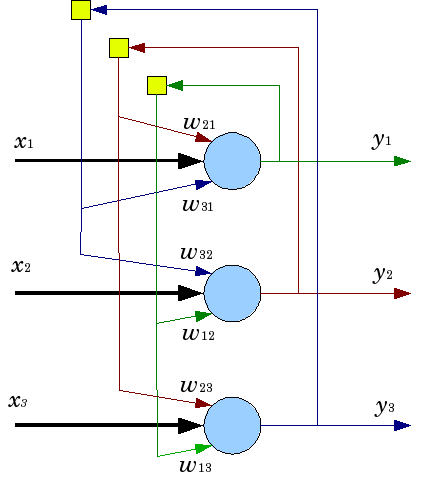

Ключевое правило сети, на основании которой можно вычислить все веса выглядит следующим образом: $X_i=WX_i$

$X_i$ - запомненные образы.

Таким образом веса вычисляются по формуле:
$W=\frac{1}{N}\sum_{i}X_{i}X_{i}^{T}$

Сеть считает веса один раз, затем остаётся в таком состоянии.

Применяется сеть последовательно с использованием пороговой функции активнации $F = sgn(x)$.

$X(t+1)=F(WX(t))$

Расчёт состояний заканчивается тогда, когда либо состояния совпадут, либо число итераций для применения закончится.

## Пример №1

In [77]:
import numpy as np

In [78]:
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [79]:
# weights = np.zeros((size, size))
# for pattern in etalons:
#     pattern = np.reshape(pattern, (1, size))
#     weights += np.dot(pattern.T, pattern)

weights = np.dot(etalons.T, etalons)
np.fill_diagonal(weights, 0)

weights

array([[ 0,  0,  2, -2,  0],
       [ 0,  0, -2,  2, -4],
       [ 2, -2,  0, -4,  2],
       [-2,  2, -4,  0, -2],
       [ 0, -4,  2, -2,  0]])

In [80]:
#максимальное количество итераций, которое позволяет сети прийти к стабильному состоянию
max_iterations=10

# На каждой итерации текущий шаблон умножается на весовую матрицу
# и передается через знаковую функцию для получения следующего шаблона

# Функция знака +1/-1, результирующий шаблон - двоичный вектор
# Если полученный шаблон такой же, как предыдущий, цикл завершается раньше
# иначе вычисляются евклидовы расст-я му восст шаблоном и каждым из исходных шаблонов
# чтобы определить наиболее близкое совпадение

# for i, noisy_pattern in enumerate(objects):
#     iteration = 0
#     while iteration < max_iterations:
#         iteration += 1
#         prev_pattern = np.copy(noisy_pattern)
#         noisy_pattern = np.sign(np.dot(noisy_pattern, weights))
#         if np.array_equal(noisy_pattern, prev_pattern):
#             break

noisy_pattern = np.copy(objects)
for i, pattern in enumerate(noisy_pattern):
    print('{:<25} {:<10} {:<10}'.format("Зашумленный объект", i, str(tuple(pattern))))
    print("")

for _ in range(max_iterations):
        prev_pattern = np.copy(noisy_pattern)
        noisy_pattern = np.sign(np.dot(noisy_pattern, weights))
        if np.array_equal(noisy_pattern, prev_pattern):
            break

for i, pattern in enumerate(noisy_pattern):
    print('{:<25} {:<10} {:<10}'.format("Результат восстановления", i, str(tuple(pattern))))
    print("")

Зашумленный объект        0          (-1, -1, -1, -1, 1)

Зашумленный объект        1          (1, -1, 1, -1, -1)

Зашумленный объект        2          (-1, 1, -1, -1, -1)

Зашумленный объект        3          (-1, 1, -1, -1, -1)

Результат восстановления  0          (1, -1, 1, -1, 1)

Результат восстановления  1          (1, -1, 1, -1, 1)

Результат восстановления  2          (-1, 1, -1, 1, -1)

Результат восстановления  3          (-1, 1, -1, 1, -1)



## Пример №2

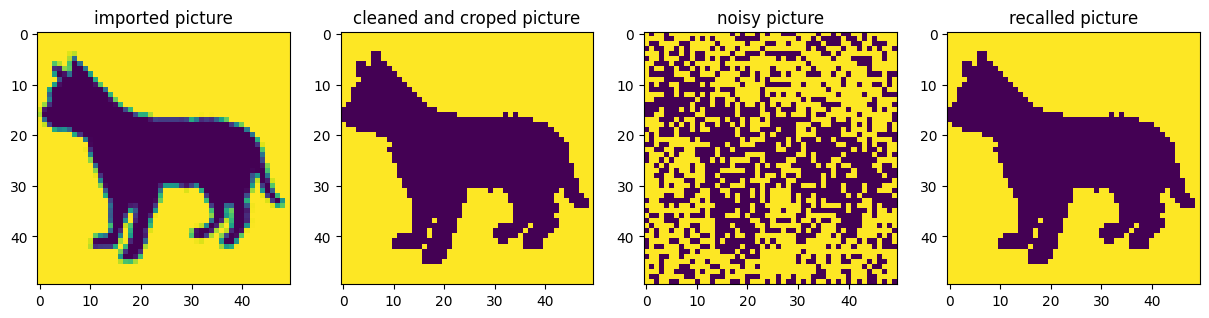

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    # coefMat = np.zeros([len(vector),len(vector)])
    # for i in range(len(vector)):
    #     for j in range(len(vector)):
    #         if (i!=(i-j)):
    #             coefMat[i][i-j] = vector[i]*vector[i-j]
    # vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    coefMat = np.outer(vector, vector) #[[a_0*b_0  a_0*b_1 ... a_0*b_{N-1} ]
                                      #  [a_1*b_0 a_1*b_1 ... a_1*b_{N-1} ] ...
    np.fill_diagonal(coefMat, 0)

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()

    # predictVec = np.zeros(len(curuptedVec))
    # for i in range(len(curuptedVec)):
    #     temp = 0
    #     for j in range(len(curuptedVec)):
    #          temp += coefMat[i][j] * curuptedVec[j] -- 1 row
    # ---- 2 row sign func
    #     if (temp>0):
    #         predictVec[i] = 1
    #     if (temp<0):
    #         predictVec[i] = -1

    temp = np.dot(coefMat, curuptedVec)
    predictVec = np.sign(temp)

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    size = len(imageVector)
    # cleanImage = np.zeros([len(imageVector),len(imageVector)])
    # for i in range(len(imageVector)):
    #     for j in range(len(imageVector)):
    #         if (imageVector[i][j] == vmax):
    #             cleanImage[i][j] = 1
    #         else:
    #             cleanImage[i][j] = -1
    cleanImage = np.where(imageVector == vmax, 1, -1)

    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])

    # for i in range(len(image)):
    #     for j in range(len(image)):
    #         if (noisyImage[i][j] >= 0):
    #             noisyImage[i][j] = 1
    #         else:
    #             noisyImage[i][j] = -1
    noisyImage = np.where(noisyImage >= 0, 1, -1)

    return cleanImage.reshape(size, size), noisyImage.reshape(size, size)

#Import the image
image = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()